In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('C:/Users/zzaid/Downloads/Telegram Desktop/pima-data.csv')

In [13]:
df


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


In [14]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [15]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [17]:
df['diabetes'].unique()

array([ True, False])

In [18]:
df['diabetes'] = df['diabetes'].map({True : 1, False : 0})

In [19]:
df['diabetes']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [22]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


In [42]:
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
X =  df.drop(['diabetes'],axis =1)

In [44]:
y = df['diabetes']

In [45]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
gc = GradientBoostingClassifier()
gc.fit(X_train,y_train)



GradientBoostingClassifier()

In [56]:
y_pred1 = dt.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = gc.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'dt':y_pred1,'rf':y_pred2 ,'gc':y_pred3})

In [58]:
df1

,Actual,dt,rf,gc
668,0,1,0,1
324,0,0,0,0
624,0,0,0,0
690,0,0,0,0
473,0,0,0,0
...,...,...,...,...
355,1,1,1,1
534,0,0,0,0
344,0,1,0,0
296,1,0,0,0


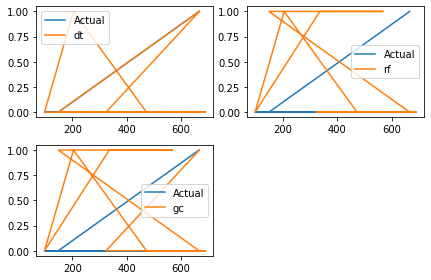

In [59]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label ='Actual')
plt.plot(df1['dt'].iloc[0:11],label ='dt')
plt.legend()


plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label ='Actual')
plt.plot(df1['rf'].iloc[0:11],label ='rf')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label ='Actual')
plt.plot(df1['gc'].iloc[0:11],label ='gc')
plt.legend()

plt.tight_layout()


In [60]:
from sklearn import metrics
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)

In [61]:
 print(score1,score2,score3)

-0.13131313131313171 -0.13131313131313171 -0.13131313131313171


In [62]:
from sklearn.metrics import accuracy_score

In [63]:
dt_accuracy = accuracy_score(y_test,y_pred1)
rf_accuracy = accuracy_score(y_test,y_pred2)
gc_accuracy = accuracy_score(y_test,y_pred3)

In [64]:
print(dt_accuracy,rf_accuracy,gc_accuracy)

0.7402597402597403 0.7402597402597403 0.7402597402597403


In [67]:
data= {'num_preg': 6,
       'glucose_conc':148,
       'diastolic_bp' :72,
       'thickness' :35,
       'insulin' : 0,
       'bmi' : 36.6,
       'diab_pred' :0.627,
       'age':50,
        'skin':1.3790,
    }
df2 = pd.DataFrame(data,index=[0])
df2

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6,148,72,35,0,36.6,0.627,50,1.379


In [68]:
result = rf.predict(df2)

In [73]:
print(result)

[1]


In [80]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [81]:
import joblib

In [83]:
joblib.dump(rf,'model_joblib_rf1')

['model_joblib_rf1']

In [84]:
model = joblib.load('model_joblib_rf1')

In [85]:
model.predict(df2)

array([1], dtype=int64)